# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
weather_api_key

'd0db4827109ae495d8f0ea52bce8da99'

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Create empty list to call on values
city_name = []
city_id = []
country = []
temps = []
humidity = []
clouds = []
wind = []
lats = []
lngs = []


In [5]:
#Set url and change units to imperial  
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={weather_api_key}&units={units}&q="
response = requests.get(query_url)



In [6]:
response

<Response [400]>

In [7]:
for city in cities:
    response_json = requests.get(query_url + city).json()
    
#Try and except for error message 
#     data = response_json[0]

    try:
        #temp = response_json['main']['temp']
        temps.append(response_json['main']['temp'])
        humidity.append(response_json['main']['humidity'])
        clouds.append(response_json['clouds']['all'])
        wind.append(response_json['wind']['speed'])
        lats.append(response_json['coord']['lat'])
        lngs.append(response_json['coord']['lon'])
        country.append(response_json['sys']['country'])
        city_id.append(response_json['id'])
        city_name.append(response_json['name'])
        
        
        print(f'City Name: {city}, City ID: {city_id}')
    except:
        
        print("That record does not exist, searching for next record...")

City Name: torbay, City ID: [6167817]
City Name: longyearbyen, City ID: [6167817, 2729907]
City Name: port elizabeth, City ID: [6167817, 2729907, 964420]
City Name: bonavista, City ID: [6167817, 2729907, 964420, 5905393]
City Name: port blair, City ID: [6167817, 2729907, 964420, 5905393, 1259385]
That record does not exist, searching for next record...
City Name: waipawa, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874]
City Name: sitka, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293]
City Name: piacabucu, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005]
City Name: vaini, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243]
City Name: eyl, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019]
City Name: tuktoyaktuk, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031]
City Name: axim, C

City Name: pisco, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145]
City Name: kamaishi, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444]
City Name: eldorado, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 40305

City Name: san vicente, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068]
City Name: sembabule, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 

City Name: tulun, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927]
City Name: new norfolk, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 58482

City Name: baykit, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689]
City Name: saskylakh, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 38312

City Name: general roca, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065]
City Name: bandarbeyla, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031

City Name: sao filipe, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210]
City Name: todos santos, City ID: 

City Name: parfino, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 20

City Name: severo-kurilsk, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165

City Name: padang, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 209

City Name: angoche, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 20

City Name: te anau, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 20

City Name: hofn, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 20940

City Name: anjozorobe, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406,

City Name: vavoua, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 209

City Name: wenling, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 20

City Name: atikokan, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 2

City Name: hopewell, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 2

City Name: nanortalik, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406,

City Name: high rock, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 

City Name: chilca, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 209

That record does not exist, searching for next record...
City Name: faanui, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547,

City Name: estrela, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 20

City Name: laguna, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 209

City Name: novyy nekouz, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 616540

City Name: saint anthony, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 61654

City Name: visnes, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 209

City Name: bengkulu, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 2

City Name: san pedro, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 

City Name: hauknes, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 20

City Name: la cruz, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 20

City Name: alyangula, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 

City Name: sidrolandia, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406

City Name: maraa, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 2094

City Name: chokurdakh, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406,

City Name: mbekenyera, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406,

City Name: ginir, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 2094

City Name: taoudenni, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 

City Name: kulu, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 20940

City Name: sibolga, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 20

City Name: bella union, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406

City Name: bondo, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 2094

City Name: del gallego, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406

City Name: ulkan, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 2094

City Name: fort nelson, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406

City Name: beba, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 20940

City Name: saveh, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 2094

City Name: terrace bay, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406

City Name: singkang, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 2

City Name: tabou, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 2094

City Name: morehead, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 2

City Name: moissala, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 2

City Name: krasnoselkup, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 616540

City Name: campoverde, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406,

City Name: papetoai, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 2

City Name: zhangye, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 20

City Name: tarpon springs, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165

City Name: le port, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 20

City Name: uvat, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 20940

City Name: nabire, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 209

City Name: dalby, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 2094

City Name: belyy yar, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 

City Name: lokvine, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 20

City Name: khovu-aksy, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406,

City Name: cooma, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 2094

City Name: mozarlandia, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406

City Name: luxor, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 2094

City Name: haines junction, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 616

City Name: young, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 2094

City Name: fortuna, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 20

City Name: khani, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 2094

City Name: qandala, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 20

City Name: kamphaeng phet, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165

City Name: namibe, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 209

City Name: altay, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 2094

City Name: rzhaksa, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 20

City Name: cobija, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 209

That record does not exist, searching for next record...
City Name: hami, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2

City Name: boyuibe, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 20

City Name: tado, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 20940

City Name: port hardy, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406,

City Name: neiafu, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 209

City Name: vasai, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 2094

City Name: nassjo, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 209

City Name: moerai, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 209

City Name: moree, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 2094

City Name: hualmay, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 20

City Name: asau, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 20940

City Name: broome, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 209

City Name: luanda, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 209

City Name: zeya, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 20940

City Name: bathsheba, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 

City Name: vertientes, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406,

City Name: synya, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 2094

City Name: whitehorse, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406,

City Name: villaviciosa, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 616540

City Name: cayenne, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 20

City Name: idritsa, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 20

City Name: strezhevoy, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406,

City Name: kudahuvadhoo, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 616540

City Name: tres picos, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406,

City Name: kirovsk, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 20

City Name: bucyrus, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 20

City Name: vanavara, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 2

City Name: pudozh, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 209

City Name: chuka, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 2094

City Name: rundu, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 2094

City Name: edson, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 2094

City Name: coquimbo, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 2

City Name: deputatskiy, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406

City Name: tiznit, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 209

City Name: katherine, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 

City Name: waiuku, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 209

City Name: hohhot, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 209

City Name: codrington, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406,

City Name: wahiawa, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 20

City Name: jinxiang, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 2

City Name: fonte boa, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 

City Name: balaipungut, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406

City Name: yumen, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 2094

City Name: pontal do parana, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 61

City Name: la tuque, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 2

City Name: galesong, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 2

That record does not exist, searching for next record...
City Name: maldonado, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 24005

City Name: zabol, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 2094

City Name: lakselv, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 20

City Name: bozhou, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 209

City Name: rudbar, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 209

City Name: sennoy, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 209

City Name: mercedes, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 2

City Name: ust-ishim, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 

City Name: kalanchak, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 

City Name: merauke, City ID: [6167817, 2729907, 964420, 5905393, 1259385, 2206874, 5557293, 3454005, 4032243, 60019, 6170031, 2303611, 6050066, 3424607, 2112309, 6176928, 6201424, 4030556, 1855540, 5847411, 6620339, 3831208, 525426, 2643044, 4470244, 1493756, 2194098, 4020109, 3372707, 2401495, 5282297, 1507390, 5848280, 2071860, 964432, 5122534, 3893726, 6929460, 2022572, 4034496, 2163355, 3932145, 2112444, 3464343, 1067565, 3386177, 2145214, 3652764, 5880054, 5072006, 158321, 2110227, 6089245, 3430863, 4178003, 5106841, 6185377, 4017152, 3428068, 226361, 778707, 2075265, 3466704, 5821593, 3380450, 5354943, 1651810, 1263983, 5882953, 1526273, 3874787, 3443061, 2014927, 2155415, 4035715, 1735106, 4328010, 3833367, 3489657, 3414079, 1282256, 2755270, 3465769, 1510689, 2017155, 3369157, 5855927, 2332079, 3418910, 3440777, 1513087, 3374462, 546105, 3855065, 64814, 2094342, 2264923, 3421719, 286621, 1071296, 3421193, 2446796, 2400547, 2122090, 3374210, 3981432, 934322, 1853483, 6165406, 20

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
#Convert data into Dataframe using a list of dictionaries
cities_df = pd.DataFrame({
    "City ID": city_id,
    "City": city_name,
    "Country": country,
    "Lat": lats,
    "Lng": lngs,
    "Temp": temps,
    "Humidity": humidity,
    "Clouds": clouds,
    "Wind": wind
})
cities_df.head()

,City ID,City,Country,Lat,Lng,Temp,Humidity,Clouds,Wind
0,6167817,Torbay,CA,47.6666,-52.7314,69.04,67,81,17.31
1,2729907,Longyearbyen,SJ,78.2186,15.6401,42.64,87,75,12.66
2,964420,Port Elizabeth,ZA,-33.9180,25.5701,59.09,88,100,8.12
3,5905393,Bonavista,CA,48.6499,-53.1147,71.60,76,100,7.70
4,1259385,Port Blair,IN,11.6667,92.7500,81.27,83,100,19.82


In [9]:
pwd

'C:\\Users\\disaa\\nu-chi-data-pt-06-2021-u-c\\nu-chi-data-pt-06-2021-u-c\\nu-chi-data-pt-06-2021-u-c\\06-Python-APIs\\Homework\\due_July29\\Instructions\\starter_code'

In [10]:
cities_df.to_csv("city_weather.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
#determine if there are cities w/ humidity >100%
humidity_df = cities_df[cities_df["Humidity"] >= 100]
humidity_df

,City ID,City,Country,Lat,Lng,Temp,Humidity,Clouds,Wind
311,2610343,Vestmanna,FO,62.1564,-7.1664,52.72,100,90,5.75
333,3105522,Bereda,ES,43.2686,-7.5406,58.86,100,11,1.99


In [12]:
humidity_df.value_counts()

City ID  City       Country  Lat      Lng      Temp   Humidity  Clouds  Wind
2610343  Vestmanna  FO       62.1564  -7.1664  52.72  100       90      5.75    1
3105522  Bereda     ES       43.2686  -7.5406  58.86  100       11      1.99    1
dtype: int64

In [13]:
#  Get the indices of cities that have humidity over 100%.



In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

The relationship between latitude and temperature shows that as a city nears the equator (latitude 0), the temperature increases

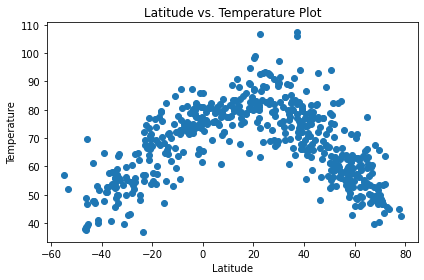

In [15]:
#Create Scatter plot on 8/3/21
x_values = cities_df["Lat"]
y_values = cities_df["Temp"]

plt.scatter(x_values, y_values)
plt.title("Latitude vs. Temperature Plot")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.tight_layout()
plt.savefig("lat_temp.png")
plt.show()

## Latitude vs. Humidity Plot

Looking at Latitude vs Humidity, there is not much of a correlation between the two values.

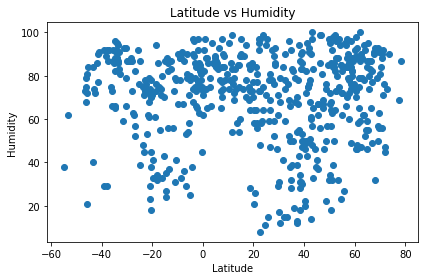

In [16]:
#Create scatter plot for Latitude vs Humidity on 8/3/21
x_values = cities_df["Lat"]
y_values = cities_df["Humidity"]
plt.scatter(x_values, y_values)
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.tight_layout()
plt.savefig("lat_humid.png")
plt.show()


## Latitude vs. Cloudiness Plot

Looking at the relationship between latitude and cloudiness reveals that there is no correlation.

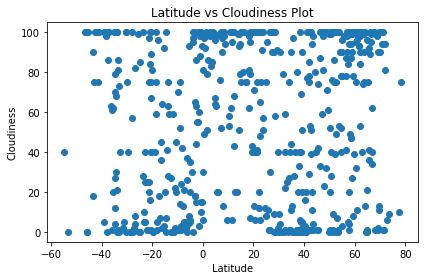

In [17]:
#Create a scatter plot for lat vs cloudiness 8/3/21
x_values = cities_df["Lat"]
y_values = cities_df["Clouds"]
plt.title("Latitude vs Cloudiness Plot")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.scatter(x_values,y_values)
plt.tight_layout()
plt.savefig("lat_cloud.png")
plt.show()


## Latitude vs. Wind Speed Plot

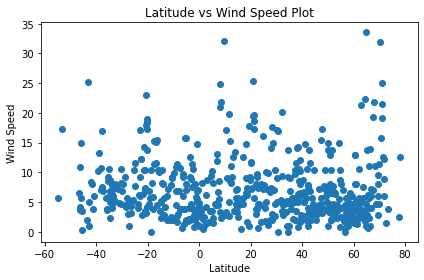

In [18]:
#Create a lat vs wind speed scatter plot 8/3/21
x_values = cities_df["Lat"]
y_values = cities_df["Wind"]
plt.title("Latitude vs Wind Speed Plot")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.scatter(x_values, y_values)
plt.tight_layout()
plt.savefig("lat_wind.png")
plt.show()


## Linear Regression

In [19]:
#Create Northern and Southern Hemisphere dataframes
mask = cities_df['Lat'] > 0
northern_hemisphere = cities_df[mask]
southern_hemisphere = cities_df[~mask]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

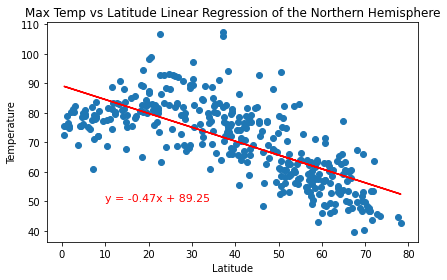

In [20]:
#Set x and y values
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Temp']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
correlation = st.pearsonr(x_values, y_values)
plt.annotate(line_eq,(10, 50),fontsize=11, color="red")
plt.scatter(x_values, y_values)
plt.title("Max Temp vs Latitude Linear Regression of the Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.tight_layout()
plt.savefig("NH Max Temp vs Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

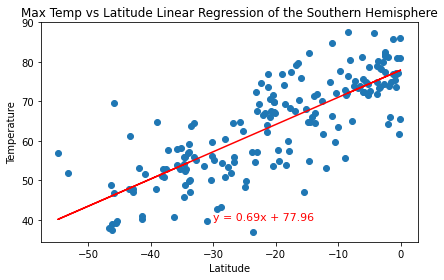

In [21]:
#Set x and y values
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Temp']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
correlation = st.pearsonr(x_values, y_values)
plt.annotate(line_eq,(-30,40),fontsize=11, color="red")
plt.scatter(x_values, y_values)
plt.title("Max Temp vs Latitude Linear Regression of the Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.tight_layout()
plt.savefig("SH Max Temp vs Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

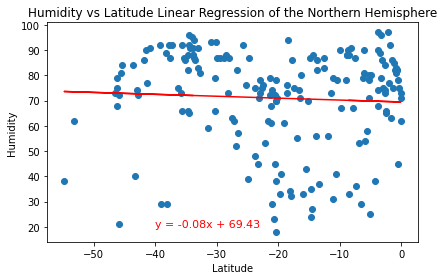

In [22]:
#Set x and y values
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
correlation = st.pearsonr(x_values, y_values)
plt.annotate(line_eq,(-40,20),fontsize=11, color="red")
plt.scatter(x_values, y_values)
plt.title("Humidity vs Latitude Linear Regression of the Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.tight_layout()
plt.savefig("NH Humidity vs Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

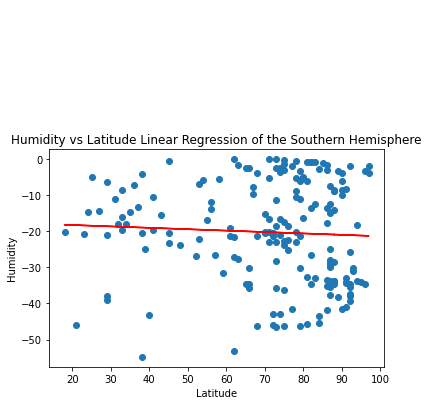

In [23]:
#Set x and y values
x_values = southern_hemisphere['Humidity']
y_values = southern_hemisphere['Lat']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
correlation = st.pearsonr(x_values, y_values)
plt.annotate(line_eq,(30,40),fontsize=11, color="red")
plt.scatter(x_values, y_values)
plt.title("Humidity vs Latitude Linear Regression of the Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("SH Humidity vs Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

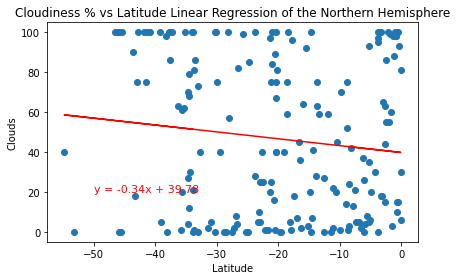

In [29]:
#Set x and y values
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Clouds']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
correlation = st.pearsonr(x_values, y_values)
plt.annotate(line_eq,(-50,20),fontsize=11, color="red")
plt.scatter(x_values, y_values)
plt.title("Cloudiness % vs Latitude Linear Regression of the Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Clouds")
plt.tight_layout()
plt.savefig("NH Cloudiness vs Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

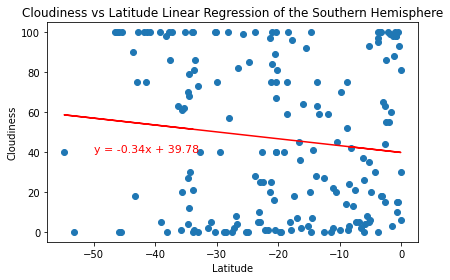

In [25]:
#Set x and y values
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Clouds']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
correlation = st.pearsonr(x_values, y_values)
plt.annotate(line_eq,(-50,40),fontsize=11, color="red")
plt.scatter(x_values, y_values)
plt.title("Cloudiness vs Latitude Linear Regression of the Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.tight_layout()
plt.savefig("SH Cloudiness vs Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

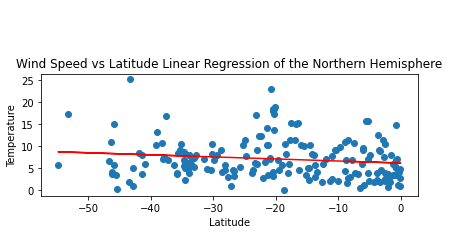

In [28]:
#Set x and y values
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Wind']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
correlation = st.pearsonr(x_values, y_values)
plt.annotate(line_eq,(-30,40),fontsize=11, color="red")
plt.scatter(x_values, y_values)
plt.title("Wind Speed vs Latitude Linear Regression of the Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.tight_layout()
plt.savefig("NH Wind Speed vs Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

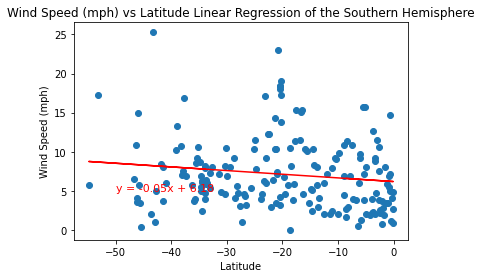

In [27]:
#Set x and y values
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Wind']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
correlation = st.pearsonr(x_values, y_values)
plt.annotate(line_eq,(-50,5),fontsize=11, color="red")
plt.scatter(x_values, y_values)
plt.title("Wind Speed (mph) vs Latitude Linear Regression of the Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("SH Wind Speed vs Latitude Linear Regression.png")
plt.show()